In [275]:
import numpy as np
import math as m
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

## Probability of making Yahtzee or Straight in one rall

In [256]:
nbExp = 500000
nbDices = 5
dices = []
nbYahtzee = 0
nbStraight = 0
probaYahtzee = []
probaStraight = []
stdYahtzee = []
stdStraight = []
for exp in range(nbExp):
    for de in range(nbDices):
        dices.append(np.random.randint(1, 7))
    nbDifferentDices = len(set(dices))
    if nbDifferentDices == 1:
        nbYahtzee += 1
    if (set(dices) == {1, 2, 3, 4, 5}) or (set(dices) == {2, 3, 4, 5, 6}):
        nbStraight +=1
    dices = []
    if exp>1 and exp%2==0:
        probaYahtzee.append((nbYahtzee / exp) * 100)
        probaStraight.append((nbStraight / exp) * 100)
probaYhatzee1Roll = nbYahtzee / nbExp
probaStraight1Roll = nbStraight / nbExp
print(f"proba of Yahtzee: {probaYhatzee1Roll}")
print(f"proba of Straight: {probaStraight1Roll}")


proba of Yahtzee: 0.000824
proba of Straight: 0.030536


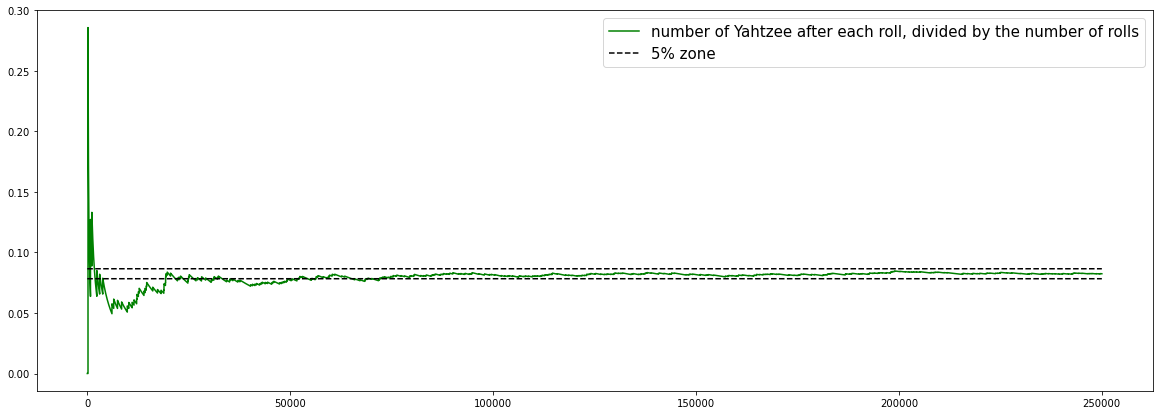

In [263]:
fivePercent = probaYhatzee1Roll*100*.05
plt.plot(probaYahtzee, label = "number of Yahtzee after each roll, divided by the number of rolls", color="g")
n = len(probaYahtzee)
plt.plot([probaYhatzee1Roll*100+fivePercent]*n, "--", color="black", label="5% accuracy")
plt.plot([probaYhatzee1Roll*100-fivePercent]*n, "--", color="black")
plt.legend(prop={"size":15})

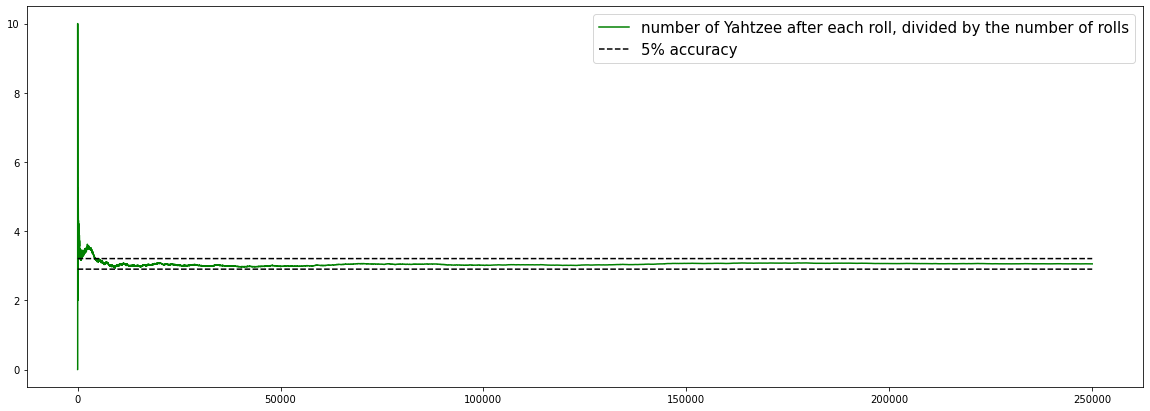

In [265]:
fivePercent = probaStraight1Roll*100*.05
plt.plot(probaStraight, label = "number of Yahtzee after each roll, divided by the number of rolls", color="g")
n = len(probaStraight)
plt.plot([probaStraight1Roll*100+fivePercent]*n, "--", color="black", label="5% accuracy")
plt.plot([probaStraight1Roll*100-fivePercent]*n, "--", color="black")
plt.legend(prop={"size":15})



## Probability of Yahtzee in 3 rolls

In [107]:
class RoundYahtzee:
    def __init__(self):
        self.rollsPlayed = 0
        self.dicesRoll1 = {}
        self.dicesRoll2 = {}
        self.dicesRoll3 = {}
        self.valueForYahtzee = 0
        self.nbDices = 5
    
    
    def roll(self):
        """
        Roll the dices and stores the values obtained
        """
        rollDices = [np.random.randint(1, 7) for i in range(self.nbDices)]
        roll = {}
        for dice in rollDices:
            roll[dice] = roll.get(dice, 0) + 1
        return roll
    
    
    def rollAllDices(self):
        """
        Simulates a roll of 5 dices with the aim of making a Yahtzee
        i.e. if a value appears multiple times, it is stored as target value 
        and dices providing this value are stored
        """
        dicesRoll = self.roll()
        nbSameDice = max(dicesRoll.values())
        if nbSameDice != 1:
            self.valueForYahtzee = max(roll, key=roll.get)
            self.nbDices -= nbSameDice
        return dicesRoll
    
    
    def isYahtzeeAchieved(self):
        if self.nbDices == 0:
            return True
    
    def play(self):
        """
        Simulate a whole round of Yahtzee: 3 rolls in a row, playing only relevant dices
        """
        if self.rollsPlayed == 0:
            self.dicesRoll1 = self.rollAllDices()
            self.rollsPlayed +=1
            
        elif self.rollsPlayed == 1:
            if self.nbDices == 5:
                # All dices are different, so we roll it all again
                self.dicesRoll2 = self.rollAllDices()
            else:
                # A dice value is identified for a Yahtzee, we try to get other dices with same value
                self.dicesRoll2 = self.roll()
                if self.valueForYahtzee in self.dicesRoll2.keys():
                    self.nbDices -= self.dicesRoll2[self.valueForYahtzee]
            self.rollsPlayed +=1
        elif self.rollsPlayed == 2:
            if self.nbDices == 5:
                self.dicesRoll3 = self.rollAllDices()
            else:
                self.dicesRoll3 = self.roll()
                if self.valueForYahtzee in self.dicesRoll3.keys():
                    self.nbDices -= self.dicesRoll3[self.valueForYahtzee]
            self.rollsPlayed +=1
            
    def completeRound(self):
        """
        Simulate a full round of Yahtzee, with the aim of making a Yahtzee
        """
        # 1st roll
        self.play()
        if self.isYahtzeeAchieved():
            return True
        else:
            # 2nd roll, if yahtzee not achieved at first roll
            self.play()
            if self.isYahtzeeAchieved():
                return True
            else:
                # 3rd roll, if yahtzee not achieved at second roll
                self.play()
                if self.isYahtzeeAchieved():
                    return True
        return False

In [333]:
nbRounds = 10000
nbYhatzee = 0
iterations = 100
resultIter = [0] * iterations
expectedValue = []
std = []

for iteration in range(iterations):
    nbYhatzee = 0
    for round_i in range(nbRounds):
        yahtzeeRound = RoundYahtzee()
        if yahtzeeRound.completeRound():
            nbYhatzee += 1

    resultIter[iteration] = nbYhatzee / nbRounds


/Users/victorgraff/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


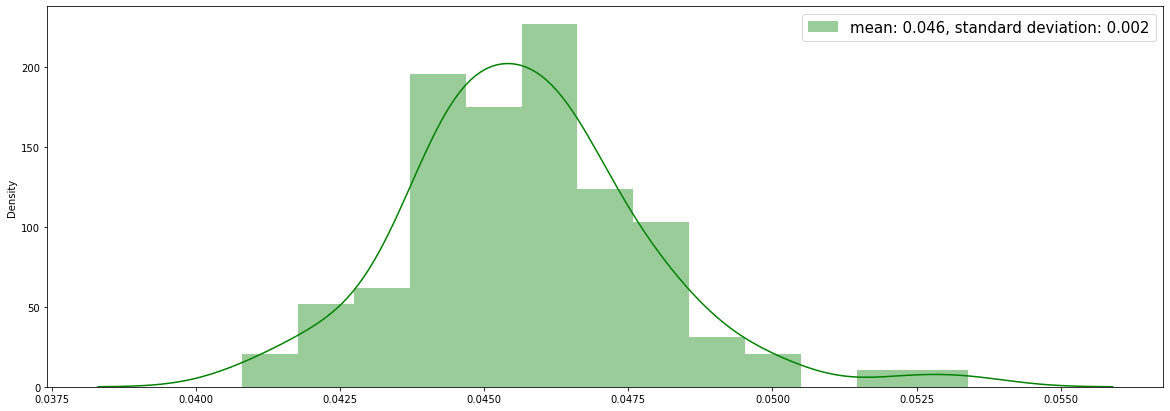

In [335]:
info = f"mean: {np.round(np.mean(resultIter), 3)}, standard deviation: {np.round(np.std(resultIter), 3)}"
sns.distplot(resultIter, color="green", label=info)
plt.legend(prop={"size":15})

## Probability Straight in 3 rolls

In [154]:
class RoundStraight:
    def __init__(self):
        self.rollsPlayed = 0
        self.dicesStored = {}
        self.dicesRoll1 = {}
        self.dicesRoll2 = {}
        self.dicesRoll3 = {}
        self.nbDices = 5


    def roll(self):
        rollDices = [np.random.randint(1, 7) for i in range(self.nbDices)]
        if (1 in rollDices): # We aim for a straight {2, 3, 4, 5, 6}
            rollDices.remove(1)
        roll = {}
        for dice in rollDices:
            if dice in roll:
                roll[dice] += 1
            else:
                roll[dice] = 1
        return roll


    def roll5Dices(self):
        dicesRoll = self.roll()
        for dice in dicesRoll.keys():
            self.dicesStored[dice] = 1
            self.nbDices -= 1
        return dicesRoll


    def isStraightAchieved(self):
        if self.nbDices == 0:
            return True


    def play(self):
        if self.rollsPlayed == 0:
            self.dicesRoll1 = self.roll5Dices()
            self.rollsPlayed +=1

        elif self.rollsPlayed == 1:
            self.dicesRoll2 = self.roll()
            for dice in self.dicesRoll2:
                if not dice in self.dicesStored.keys():
                    self.dicesStored[dice] = 1
                    self.nbDices -= 1
            self.rollsPlayed +=1

        elif self.rollsPlayed == 2:
            self.dicesRoll3 = self.roll()
            for dice in self.dicesRoll3:
                if not dice in self.dicesStored.keys():
                    self.dicesStored[dice] = 1
                    self.nbDices -= 1
            self.rollsPlayed +=1


    def completeRound(self):
        # Tour 1
        self.play()
        if self.isStraightAchieved():
            return True
        else:
            # Tour 2
            self.play()
            if self.isStraightAchieved():
                return True
            else:
                # Tour 3
                self.play()
                if self.isStraightAchieved():
                    return True
        return False

In [342]:
nbRounds = 10000
nbStraight = 0
iterations = 100
resultIter = [0] * iterations

for iteration in range(iterations):
    nbStraight = 0
    for i in range(nbRounds):
        straightRound = RoundStraight()
        if straightRound.completeRound():
            nbStraight += 1


    resultIter[iteration] = nbStraight / nbRounds

/Users/victorgraff/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


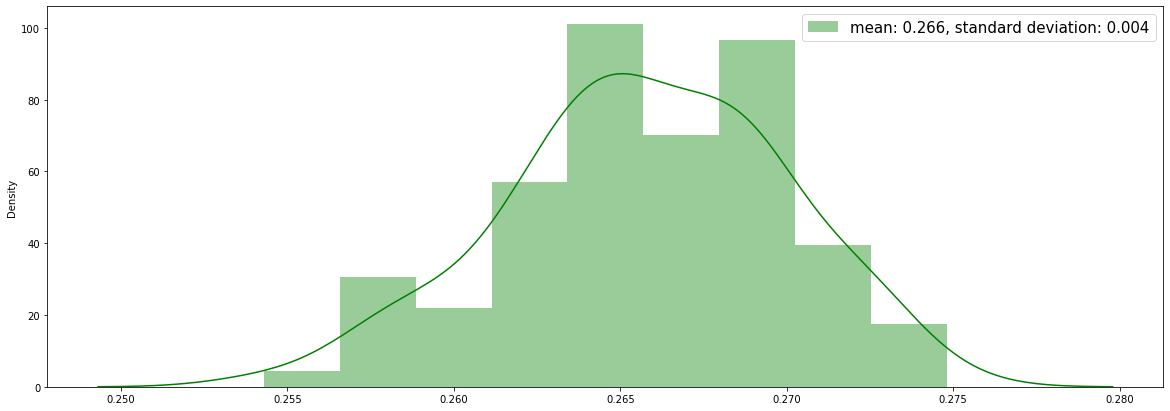

In [343]:
info = f"mean: {np.round(np.mean(resultIter), 3)}, standard deviation: {np.round(np.std(resultIter), 3)}"
sns.distplot(resultIter, color="green", label=info)
plt.legend(prop={"size":15})